# HW2

prepared by Danila Danko

## Problem 1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
from sympy.utilities.lambdify import lambdify

plt.rcParams['font.size'] = '16'


### Phase portraits

[]

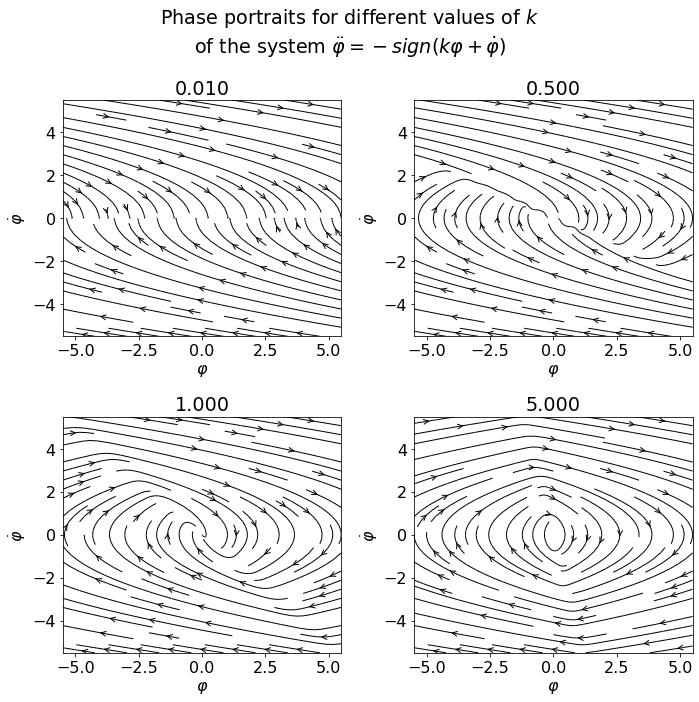

In [11]:
HEIGHT = 2
X_RANGE = [5,5]
N = 30
K = 1.1
SCALE = 5
KS = [0.01, 0.5, 1, 5]
WIDTH = 2

X1_MAX, X2_MAX = X_RANGE
X1_SPAN = np.linspace(-K*X1_MAX, K*X1_MAX, N)
X2_SPAN = np.linspace(-K*X2_MAX, K*X2_MAX, N)
X1_GRID, X2_GRID = np.meshgrid(X1_SPAN, X2_SPAN)


def sign(x):
    return np.tanh(100 * x)

# https://stackoverflow.com/a/43843544
# using tanh instead of sign function

def sys(state, k):
    phi, dphi = state
    ddphi = -sign(k * phi + dphi)
    return np.array([dphi, ddphi])

def f (k,ax):
    dx1, dx2 = sys(state=[X1_GRID, X2_GRID], k=k)
    ax.streamplot(x=X1_SPAN, y=X2_SPAN, u=dx1, v=dx2,
            arrowsize=1.2, # size of the arrows 
           density=0.9, # density of the vectorfield
           color='k', # color for the trajectories
           linewidth=1, # the width of the lines for trajectories 
           arrowstyle='->') # you can change type of arrows
    ax.set_title(f"{k:.3f}")
    ax.set_xlabel("$\\varphi$")
    ax.set_ylabel("$\\dot{\\varphi}$")

fig,axs = plt.subplots(nrows=HEIGHT,ncols=WIDTH,figsize=(WIDTH * SCALE, HEIGHT * SCALE))
fig.suptitle(f"Phase portraits for different values of $k$\n"+\
        f"of the system $\\ddot{{\\varphi}}=-sign(k\\varphi+\\dot{{\\varphi}})$")
fig.subplots_adjust(wspace=0.6)

for l,x in enumerate(KS):
    i = l // WIDTH
    j = l % WIDTH
    f(k = x, ax = axs[i,j])

plt.tight_layout()
plt.plot()

### Trajectories

[]

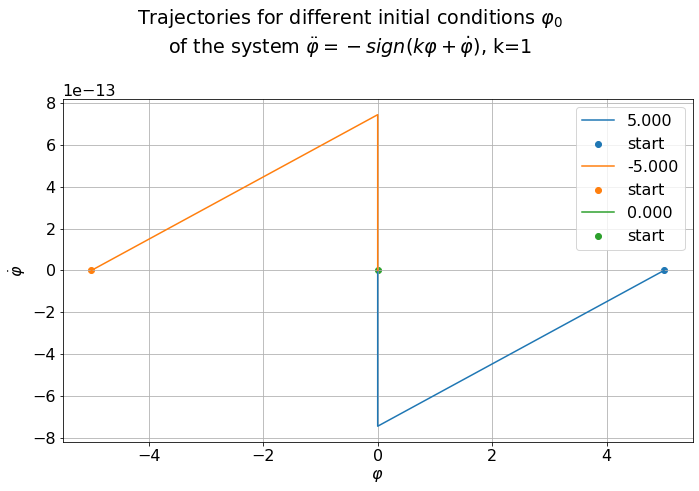

In [7]:
# TODO phase plot
T_START = 0
T_END = 1000000
N_LIM = 10000
T_LINSPACE = np.linspace(0,T_END,N_LIM)
PHI_0 = [5, -5, 0]
K = 1

def sign(x):
    return np.tanh(100 * x)

# https://stackoverflow.com/a/43843544
# using tanh instead of sign function

def sys_1(state, t):
    phi, dphi = state
    ddphi = -sign(K * phi + dphi)
    return np.array([dphi, ddphi])

def f (phi_0):
    y0 = np.array([phi_0,0.])
    ys = odeint(func=sys_1,y0=y0,t=T_LINSPACE)
    axs.plot(ys[:,0], ys[:,1],label=f"{phi_0:.3f}")
    axs.scatter([ys[0,0]],[ys[0,1]],label="start",marker='o')
    axs.legend()
    axs.grid()
    axs.set_xlabel("$\\varphi$")
    axs.set_ylabel("$\\dot{\\varphi}$")

fig, axs = plt.subplots(1,1,figsize=(10,7))
fig.suptitle(
    f"Trajectories for different initial conditions $\\varphi_{{0}}$\n"+\
        f"of the system $\\ddot{{\\varphi}}=-sign(k\\varphi+\\dot{{\\varphi}})$, k={K}")


for x in PHI_0:
    f(x)


plt.tight_layout()
plt.plot()


### Convergence of the trajectories

Both trajectories starting with $\varphi_{0} \neq 0$ converge to $0$. The trajectory that starts at $0$ remains there. 

## Problem 2

[]

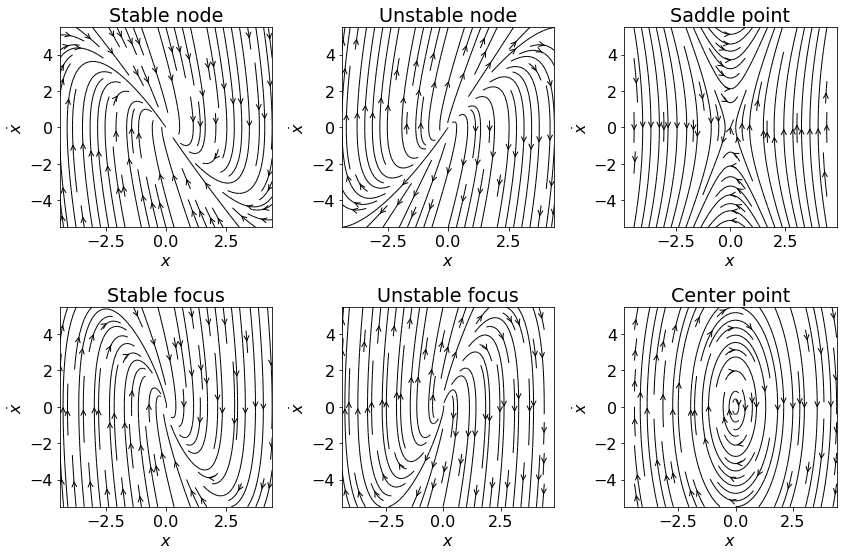

In [11]:
CHARACTERISTICS = {
    "Stable node": [-3,-2],
    "Unstable node": [2,3],
    "Saddle point": [-3,3],
    "Stable focus": [-3+2j,-3-2j],
    "Unstable focus": [3+2j,3-2j],
    "Center point": [3j,-3j]
}
HEIGHT = 2
WIDTH = 3
X_RANGE = [4,5]
N = 30
K = 1.1
SCALE = 4

X1_MAX, X2_MAX = X_RANGE
X1_SPAN = np.linspace(-K*X1_MAX, K*X1_MAX, N)
X2_SPAN = np.linspace(-K*X2_MAX, K*X2_MAX, N)
X1_GRID, X2_GRID = np.meshgrid(X1_SPAN, X2_SPAN)


def g(l1,l2):
    a = np.real(-(l1 + l2))
    b = np.real(l1 * l2)
    
    def sys(x):
        return x[1], - b * x[0] - a * x[1]

    dx1, dx2 = sys([X1_GRID, X2_GRID])
    return dx1, dx2


def f (l1,l2,name,ax):
    dx1, dx2 = g(l1,l2)
    ax.streamplot(x=X1_SPAN, y=X2_SPAN, u=dx1, v=dx2,
            arrowsize=1.2, # size of the arrows 
           density=0.9, # density of the vectorfield
           color='k', # color for the trajectories
           linewidth=1, # the width of the lines for trajectories 
           arrowstyle='->') # you can change type of arrows
    ax.set_title(name)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$\\dot{x}$")

fig.suptitle(f"Trajectories near different types of equilibrium points")
fig,axs = plt.subplots(nrows=HEIGHT,ncols=WIDTH,figsize=(WIDTH * SCALE, HEIGHT * SCALE))

def plot_systems():
    for (k,t) in enumerate(CHARACTERISTICS.items()):
        x,[y,z] = t
        i = k//WIDTH
        j = k%WIDTH
        # print(i,j)
        f(name = x,l1=y,l2=z, ax=axs[i,j])

plot_systems()

plt.tight_layout()
plt.plot()


## Problem 3

[]

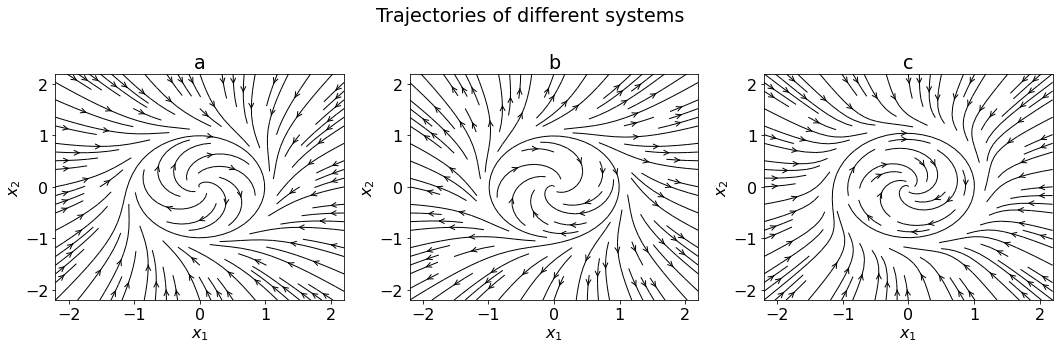

In [13]:

HEIGHT = 1
WIDTH = 3
X_RANGE = [2,2]
N = 30
K = 1.1
SCALE = 5

X1_MAX, X2_MAX = X_RANGE
X1_SPAN = np.linspace(-K*X1_MAX, K*X1_MAX, N)
X2_SPAN = np.linspace(-K*X2_MAX, K*X2_MAX, N)
X1_GRID, X2_GRID = np.meshgrid(X1_SPAN, X2_SPAN)

def sys_a (x):
    dx1 = x[1] - x[0] * (x[0] ** 2 + x[1] ** 2 - 1)
    dx2 = -x[0] - x[1] * (x[0] ** 2 + x[1] ** 2 - 1)
    return dx1, dx2

def sys_b (x):
    dx1 = x[1] + x[0] * (x[0] ** 2 + x[1] ** 2 - 1)
    dx2 = -x[0] + x[1] * (x[0] ** 2 + x[1] ** 2 - 1)
    return dx1, dx2

def sys_c (x):
    dx1 = x[1] - x[0] * (x[0] ** 2 + x[1] ** 2 - 1) ** 2
    dx2 = -x[0] - x[1] * (x[0] ** 2 + x[1] ** 2 - 1) ** 2
    return dx1, dx2


SYSTEMS = {
    "a": sys_a,
    "b": sys_b,
    "c": sys_c
}

def f (sys,name,ax):
    dx1, dx2 = sys([X1_GRID, X2_GRID])
    ax.streamplot(x=X1_SPAN, y=X2_SPAN, u=dx1, v=dx2,
            arrowsize=1.2, # size of the arrows 
           density=0.9, # density of the vectorfield
           color='k', # color for the trajectories
           linewidth=1, # the width of the lines for trajectories 
           arrowstyle='->') # you can change type of arrows
    ax.set_title(name)
    ax.set_xlabel("$x_{1}$")
    ax.set_ylabel("$x_{2}$")
    ax.yaxis.labelpad = 2

fig,axs = plt.subplots(nrows=HEIGHT,ncols=WIDTH,figsize=(WIDTH * SCALE, HEIGHT * SCALE))
fig.suptitle(f"Trajectories of different systems")
fig.subplots_adjust(wspace=0.6)

def plot_systems():
    for (i,t) in enumerate(SYSTEMS.items()):
        name,sys = t
        f(name = name,sys = sys, ax=axs[i])

plot_systems()

plt.tight_layout()
plt.plot()

### Description of trajectories

They represent limit cycles:


<ol type="a">
  <li>Stable</li>
  <li>Unstable</li>
  <li>Semi-stable</li>
</ol>


## Problem 4

In [13]:
STABLE = "asymptotically stable"
UNSTABLE = "unstable"
UNDEFINED ="undefined"

NEG_1 = -1
ZERO = 0
POS_1 = 1

def system(x):
    return x[1], -x[1] - sp.sin(x[0])

def classify(x):
    # strictly in the left-hand plane
    if np.real(x) < 0.:
        return NEG_1
    if np.real(x) == 0.:
        return ZERO
    if np.real(x) > 0.:
        return POS_1


def g():
    x = sp.symbols('x_1, x_2')
    f_sym = sp.Matrix(system(x)).T
    equlibriums = sp.solve(f_sym, x)
    jacobian = f_sym.jacobian(x)
    jacobian_num = lambdify([x], jacobian)

    for equlibrium in equlibriums:
        x_e = np.array(equlibrium, dtype='double')
        A = np.array(jacobian_num(x_e), dtype='double')
        ls = np.array([classify(x) for x in np.linalg.eigvals(A)])
        p = None
        if (ls < 0).all():
            p = STABLE
        elif (ls <= 0).all():
            p = UNDEFINED
        else:
            p = UNSTABLE
        
        print(f"The type of equilibrium {x_e} is: {p}")

g()

# print point, in legend put type

The type of equilibrium [0. 0.] is: asymptotically stable
The type of equilibrium [3.14159265 0.        ] is: unstable


## Problem 5

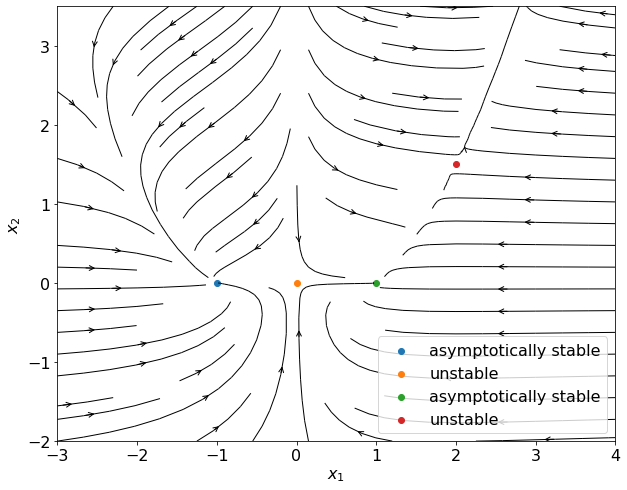

In [14]:
# need to make a meshgrid including equilibrium points
# plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

STABLE = "asymptotically stable"
UNSTABLE = "unstable"
UNDEFINED ="undefined"

NEG_1 = -1
ZERO = 0
POS_1 = 1

MARGIN = 2
N = 30
SCALE = 4

def test_sys(x):
    dx0 = x[0] - x[0] ** 3 + 2 * x[0] * x[1]
    dx1 = - x[1] + 1 / 2 * x[0] * x[1]
    return [dx0, dx1]

def classify(x):
    # strictly in the left-hand plane
    if np.real(x) < 0.:
        return NEG_1
    if np.real(x) == 0.:
        return ZERO
    if np.real(x) > 0.:
        return POS_1

def get_equilibriums(f):
    x = sp.symbols('x_1, x_2')
    f_sym = sp.Matrix(f(x)).T
    equlibriums = sp.solve(f_sym, x)
    jacobian = f_sym.jacobian(x)
    jacobian_num = lambdify([x], jacobian)

    ans = []
    for equlibrium in equlibriums:
        x_e = np.array(equlibrium, dtype='double')
        A = np.array(jacobian_num(x_e), dtype='double')
        ls = np.array([classify(x) for x in np.linalg.eigvals(A)])
        p = None
        if (ls < 0).all():
            p = STABLE
        elif (ls <= 0).all():
            p = UNDEFINED
        else:
            p = UNSTABLE
        
        ans += [(x_e, p)]
    
    return ans

def place_equilibriums(es, ax):
    for x, name in es:
        ax.scatter([x[0]],[x[1]],label = name, marker='o')
    ax.legend()


def get_streamplot_data(f, bounds):
    x_min, x_max, y_min, y_max = bounds
    x1_span = np.linspace(x_min-MARGIN, x_max+MARGIN, N)
    x2_span = np.linspace(y_min-MARGIN, y_max+MARGIN, N)
    x1_grid, x2_grid = np.meshgrid(x1_span, x2_span)
    dx1, dx2 = f([x1_grid, x2_grid])
    return x1_span, x2_span, dx1, dx2


def get_bounds(xs):
    a = np.array(xs)
    x_min = np.min(a[:,0])
    x_max = np.max(a[:,0])
    y_min = np.min(a[:,1])
    y_max = np.max(a[:,1])
    return [x_min, x_max, y_min, y_max]

def draw_streamplots(dat, ax):
    x1_span, x2_span, dx1, dx2 = dat
    ax.streamplot(x=x1_span, y=x2_span, u=dx1, v=dx2,
            arrowsize=1.2, # size of the arrows 
           density=0.7, # density of the vectorfield
           color='k', # color for the trajectories
           linewidth=1, # the width of the lines for trajectories 
           arrowstyle='->') # you can change type of arrows
    ax.set_xlabel("$x_{1}$")
    ax.set_ylabel("$x_{2}$")

def solve(f):
    _, ax = plt.subplots(figsize=(10,8))
    es = get_equilibriums(f)
    place_equilibriums(es=es, ax=ax)
    ds = get_streamplot_data(bounds=get_bounds([x[0] for x in es]), f=f)
    draw_streamplots(dat=ds, ax=ax)
    plt.plot()

solve(test_sys)

